<a href="https://colab.research.google.com/github/Jonny-T87/Dojo-Work/blob/main/Mock_Belt_Exam_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mock Belt Exam 
Machine Learning - Belt Exam Practice

Jonny Tesfahun
- 07/08/22


In [163]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn import set_config
set_config(display='diagram')

In [109]:
#Source from class lecture
# Create a function to take the true and predicted labels and print MAE, MSE, RMSE, and R2 metrics
def evaluate_regression(y_true, y_pred):
  """Takes true target and predicted target and prints MAE, MSE, RMSE and R2"""
  
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'scores: \nMAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR2: {r2:.2f}')

In [53]:
df = pd.read_csv('/content/drive/MyDrive/DojoBootCamp/Project Files/Fish - Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  155 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  157 non-null    float64
 3   Length2  157 non-null    float64
 4   Length3  150 non-null    float64
 5   Height   156 non-null    float64
 6   Width    157 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [55]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,157.000000,157.000000,150.000000,156.000000,157.000000
mean,398.326415,26.080255,28.168153,31.196000,8.907132,4.416820
std,357.978317,9.939357,10.407117,11.071718,4.250476,1.695044
min,0.000000,7.500000,8.400000,10.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.275000,5.949000,3.375600
50%,273.000000,25.000000,27.000000,29.700000,7.733000,4.248500
75%,650.000000,32.500000,35.000000,39.575000,12.038100,5.589000
max,1650.000000,59.000000,60.000000,64.000000,18.957000,8.142000


##Prepare/clean the data for exploratory analysis purposes:

- For this task, handle missing values by using an appropriate imputation strategy (instead of dropping rows).
- Write a justification of your strategy for imputing missing values.
- Make sure you avoid any data leakage when you impute values.
- Ensure data types match the data types listed in the data dictionary  (if given).
- Check for and address any inconsistent values in categorical columns.
- Check for and address any impossible values in numeric columns.

In [56]:
#Taking a look at duplicates vakues in dataset
df.duplicated().sum()

0

In [57]:
#Checking Species for Typos, none found
df['Species'].value_counts()

Perch        53
Bream        33
Roach        19
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Beam          2
Name: Species, dtype: int64

In [58]:
#May be an outlier
df['Weight'].min()

0.0

In [63]:
#Checking column with outlier
df.loc[df['Weight'] == 0.0 ]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [64]:
#droping column
df = df.drop(index = 40)

##Explore the data 
- Create at least two different types of exploratory visualizations.
- Write one to two sentences about what each visualization tells you about the data.

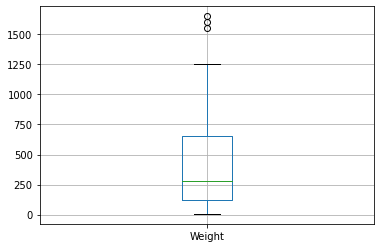

In [72]:
df.boxplot(column='Weight');

This boxplot shows any outliers, min., and avg. of column. The min. is around 0, the avg. is around 250, and outliers are over 1500. 

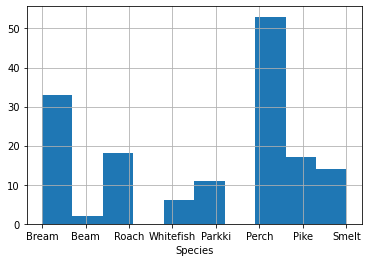

In [80]:
df['Species'].hist()
plt.xlabel('Species');

This histogram shows the distribution of the Species in the dataset. As we can see, over 50 rows are Perch and the lowest amount of rows is Beam.

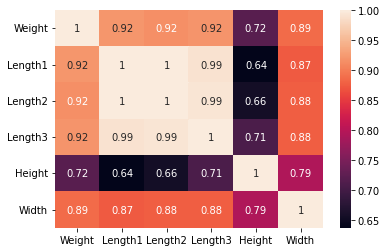

In [124]:
#Looking at the correlation of the dataset columns
corr = df.corr()
sns.heatmap(corr, annot=True)

##Prepare the data appropriately for modeling 

- Implement a preprocessing pipeline to avoid data leakage.
- Scale the data if your model requires it.
- Write a justification for how you encode the variables (ordinal encoding vs one-hot encoding).

In [82]:
#Validation Spliting target and features
X = df.drop(columns='Weight')
y = df['Weight']

In [83]:
# Also Train test split the data to prepare for machine learning.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [85]:
#Checking Train data
X_train.head()

,Species,Length1,Length2,Length3,Height,Width
26,Bream,32.0,35.0,40.6,NaN,6.0900
137,Pike,42.0,45.0,48.0,6.9600,4.8960
79,Perch,17.2,19.0,NaN,5.6358,3.0502
150,Smelt,10.8,11.3,12.6,1.9782,1.2852
36,Roach,16.5,18.2,20.3,5.2983,2.8217


In [86]:
# instantiating a object and number column selector
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

I will be using OneHotEncoder (OHE) over Ordinal because the are too many diffrent types of Species. Also they are not in any specific order and there is no natural order.

In [89]:
#instanting scaller and encoder, scaler for numeric columns and ohe for Species column
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [92]:
#Using 'mean' strategy for number column and  ‘most_frequent’ strategy for categorical columns with SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

In [94]:
#Numer pipeline for pipeline
number_pipe = make_pipeline(mean_imputer, scaler)
number_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [95]:
# Making Categorical pipeline for Objects
categor_pipe = make_pipeline(freq_imputer, ohe)
categor_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [96]:
# making tuples for object and number columns
num_tuple = (number_pipe, num_selector)
cat_tuple = (categor_pipe, cat_selector)

In [100]:
#Using column transformer to preprocesses the num_tuple and cat_tuple, and using diagram with set_config
preprocessing = make_column_transformer(num_tuple, cat_tuple)
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ffaa30b7e10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ffaa32b1610>)])

In [101]:
#fitting column transformer with training data
preprocessing.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ffaa30b7e10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ffaa32b1610>)])

In [103]:
##Using ColumnTransformer to transform both the training and testing datasets.
X_train_processed = preprocessing.transform(X_train)
X_test_processed = preprocessing.transform(X_test)

In [105]:
#Checking if done correctly. Looks good. 
X_train_processed

array([[ 0.61855985,  0.71556973,  0.92076781, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.63888273,  1.71383898,  1.63465008, ...,  0.        ,
         0.        ,  0.        ],
       [-0.89151802, -0.88166107,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.3532759 ,  0.41608895,  0.59276785, ...,  0.        ,
         0.        ,  0.        ],
       [-0.53440501, -0.51230145, -0.66134966, ...,  0.        ,
         0.        ,  0.        ],
       [-0.05485326, -0.03313221, -0.20793794, ...,  0.        ,
         0.        ,  0.        ]])

In [106]:
#Source from class lecture in codealong
#Printing data for easy viewing and validation
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (118, 13)




##Create and compare at least 2 different models
- Put your preprocessing and models into pipelines.
- For each model type, create a default version of each model with default hyperparameters.
- Create additional versions of each model type where you tune hyperparameters for each model.
- Use appropriate metrics to evaluate each model.

Model 1:

In [116]:
#Using linear Regression due to Weight column value is numberic and prediction is not categorical & using Defualtfor Regression
lin_reg = LinearRegression()

In [117]:
#Using preprocessed data from Above with Linear Regression in pipeline
lin_reg_pipe = make_pipeline(preprocessing, lin_reg)

In [118]:
##fitting line regression on train data
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffaa30b7e10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffaa32b1610>)])),
                ('linearregression', LinearRegression())])

In [119]:
#Evaluate the model performance on both the training set and the test set using the R-squared score.
print('Training')
evaluate_regression(y_train, lin_reg_pipe.predict(X_train))
print('Testing')
evaluate_regression(y_test, lin_reg_pipe.predict(X_test))

Training
scores: 
MAE: 72.84 
MSE: 9,747.75 
RMSE: 98.73 
R2: 0.92
Testing
scores: 
MAE: 72.71 
MSE: 14,858.21 
RMSE: 121.89 
R2: 0.89


Tuning Model 1:

In [120]:
lin_reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [151]:
#Changing 
lin_reg_2 = LinearRegression(fit_intercept=False, normalize=False)

In [146]:
#Using preprocessed data from Above with Linear Regression in pipeline
lin_reg_pipe_2 = make_pipeline(preprocessing, lin_reg_2)

In [147]:
lin_reg_pipe_2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffaa30b7e10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffaa32b1610>)])),
                ('linearregression',
                 LinearRegression(fit_intercept=False, normalize=False))])

In [148]:
#Evaluate the tuned model performance on both the training set and the test set using the R-squared score.
print('Training')
evaluate_regression(y_train, lin_reg_pipe.predict(X_train))
print('Testing')
evaluate_regression(y_test, lin_reg_pipe.predict(X_test))

Training
scores: 
MAE: 72.84 
MSE: 9,747.75 
RMSE: 98.73 
R2: 0.92
Testing
scores: 
MAE: 72.71 
MSE: 14,858.21 
RMSE: 121.89 
R2: 0.89


Model 2:

In [164]:
Ran_Forest = RandomForestRegressor()

In [165]:
#Using preprocessed data from Above with Random Forest Regression in pipeline
Ran_Forest_pipe = make_pipeline(preprocessing, Ran_Forest)

In [166]:
Ran_Forest_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffaa30b7e10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffaa32b1610>)])),
                ('randomforestregressor', RandomForestRegressor())])

In [167]:
#Evaluating the Random Forest model performance on both the training set and the test set using the R-squared score.
print('Training')
evaluate_regression(y_train, Ran_Forest_pipe.predict(X_train))
print('Testing')
evaluate_regression(y_test, Ran_Forest_pipe.predict(X_test))

Training
scores: 
MAE: 17.36 
MSE: 1,154.31 
RMSE: 33.98 
R2: 0.99
Testing
scores: 
MAE: 49.55 
MSE: 5,945.02 
RMSE: 77.10 
R2: 0.95


Tuning Model 2:

In [168]:
Ran_Forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [335]:
Ran_Forest_2 = RandomForestRegressor(max_depth=7, n_estimators=50, max_samples=50)

In [336]:
#Using preprocessed data from Above with tuned Random Forest Regression in pipeline
Ran_Forest_pipe_2 = make_pipeline(preprocessing, Ran_Forest_2)

In [337]:
Ran_Forest_pipe_2.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffaa30b7e10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffaa32b1610>)])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=7, max_samples=50,
                                       n_estimators=50))])

In [338]:
#Evaluating the tuned Random Forest model performance on both the training set and the test set using the R-squared score.
#did a little better than default settings when using max_depth at 7, max_sample =50
print('Training')
evaluate_regression(y_train, Ran_Forest_pipe_2.predict(X_train))
print('Testing')
evaluate_regression(y_test, Ran_Forest_pipe_2.predict(X_test))

Training
scores: 
MAE: 35.93 
MSE: 5,074.87 
RMSE: 71.24 
R2: 0.96
Testing
scores: 
MAE: 44.98 
MSE: 4,528.55 
RMSE: 67.29 
R2: 0.97
